# HW 4

In [1]:
# Eric Liu
# Eric Wang
# Austin Du

#### Imports

In [2]:
library("ggplot2")
library("gridExtra")
library("dplyr")
library("reshape2")
library("visreg")


Attaching package: ‘dplyr’



The following object is masked from ‘package:gridExtra’:

    combine



The following objects are masked from ‘package:stats’:

    filter, lag



The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



#### Load Data

In [3]:
gauge = read.table("./gauge.txt", sep="", header=T)
density = gauge$density
gain = gauge$gain
head(gauge)

,density,gain
,<dbl>,<dbl>
1,0.686,17.6
2,0.686,17.3
3,0.686,16.9
4,0.686,16.2
5,0.686,17.1
6,0.686,18.5


In [4]:
# the unique densities of the blocks
sort(unique(gauge$density))

[1] 0.001 0.080 0.148 0.223 0.318 0.412 0.508 0.604 0.686

#### Best Fit Line

In [5]:
# function to print out the equation of the line and the sum of squared residuals
summarize_fit = function(line) {
    cat("intercept:\t\t", line$coefficients[1], "\n")
    cat("slope:\t\t\t", line$coefficients[2], "\n")
    cat("sum squared residuals:\t", sum(resid(line)^2), "\n")
    cat("r squared:\t\t", summary(line)$r.squared)
}

intercept:		 318.7015 
slope:			 -531.9507 
sum squared residuals:	 291335 
r squared:		 0.8156974

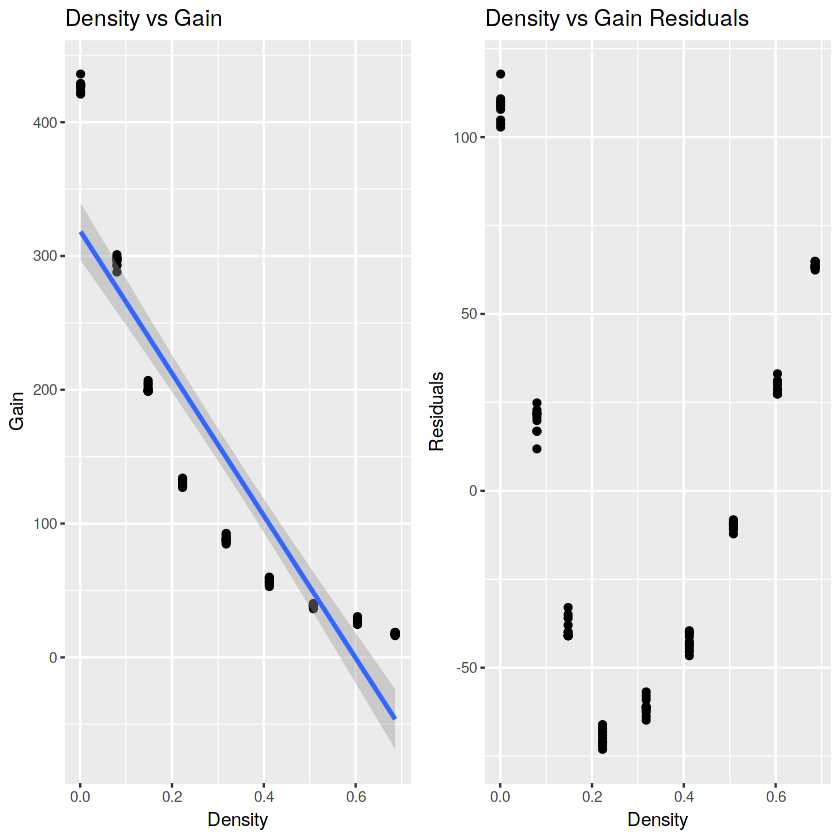

In [6]:
# without any transformations, fit the data with linear regression and plot the residuals
reg_plot = ggplot(gauge, aes(x=density, y=gain)) +
    geom_point() +
    stat_smooth(method='lm', formula = y~x) +
    labs(title="Density vs Gain", x="Density", y="Gain")

# compute the residuals for the linear regression and plot
lin_reg = lm(gauge$gain ~ gauge$density)
residuals = data.frame(x=gauge$density, resid=resid(lin_reg))
resid_plot = ggplot(residuals, aes(x=x, y=resid)) +
    geom_point() +
    labs(title="Density vs Gain Residuals", x="Density", y="Residuals")

# put both plots side by side
grid.arrange(reg_plot, resid_plot, ncol=2)

# print out the equation of the line and the sum of squared residuals
summarize_fit(lin_reg)

Since the residuals show a polynomial pattern, try doing polynomial regression

intercept:		 18.28919 
slope:			 -23.02002 
sum squared residuals:	 175.6669 
r squared:		 0.9321839

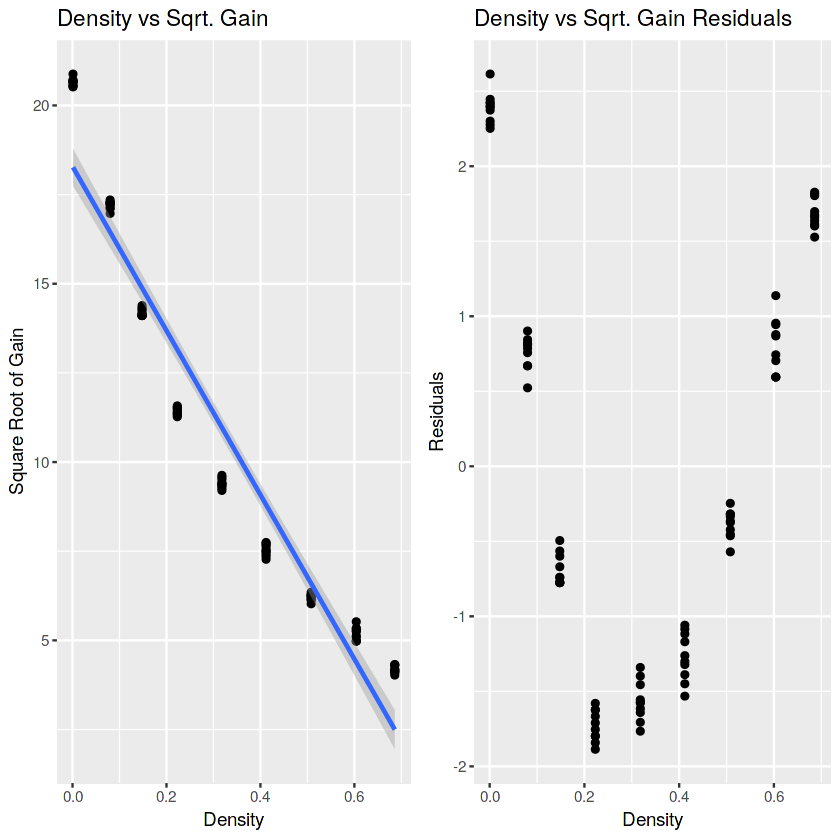

In [7]:
# transform data (take the sqrt of y axis) and fit to linear regression
gauge$sqrt_gain = sqrt(gauge$gain)
reg_plot = ggplot(gauge, aes(x=density, y=sqrt_gain)) +
    geom_point() +
    stat_smooth(method='lm', formula = y~x) +
    labs(title="Density vs Sqrt. Gain", x="Density", y="Square Root of Gain")

# compute the residuals for the linear regression and plot
lin_reg = lm(gauge$sqrt_gain ~ gauge$density)
residuals = data.frame(x=gauge$density, resid=resid(lin_reg))
resid_plot = ggplot(residuals, aes(x=x, y=resid)) +
    geom_point() +
    labs(title="Density vs Sqrt. Gain Residuals", x="Density", y="Residuals")

# put both plots side by side
grid.arrange(reg_plot, resid_plot, ncol=2)

# print out the equation of the line and the sum of squared residuals
summarize_fit(lin_reg)

Since the residuals still show a polynomial pattern, try cubic regression

intercept:		 7.03021 
slope:			 -7.004705 
sum squared residuals:	 8.76708 
r squared:		 0.9622668

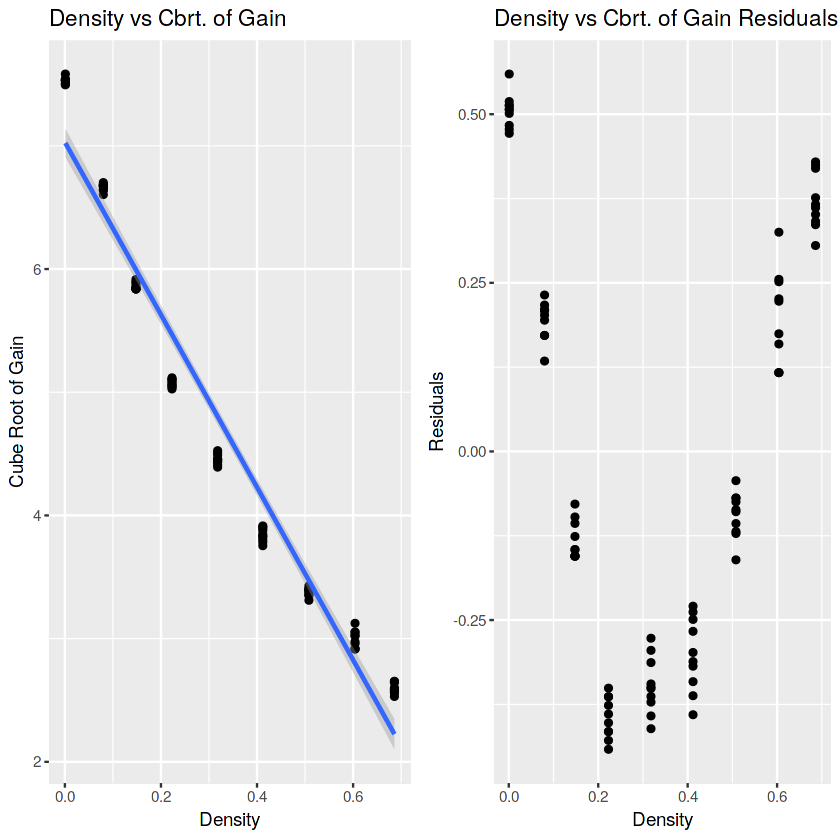

In [8]:
# transform data (take the cube root of y axis) and fit to linear regression
gauge$cubert_gain = (gauge$gain)^(1/3)
reg_plot = ggplot(gauge, aes(x=density, y=cubert_gain)) +
    geom_point() +
    stat_smooth(method='lm', formula = y~x) +
    labs(title="Density vs Cbrt. of Gain", x="Density", y="Cube Root of Gain")

# compute the residuals for the linear regression and plot
lin_reg = lm(gauge$cubert_gain ~ gauge$density)
residuals = data.frame(x=gauge$density, resid=resid(lin_reg))
resid_plot = ggplot(residuals, aes(x=x, y=resid)) +
    geom_point() +
    labs(title="Density vs Cbrt. of Gain Residuals", x="Density", y="Residuals")

# put both plots side by side
grid.arrange(reg_plot, resid_plot, ncol=2)

# print out the equation of the line and the sum of squared residuals
summarize_fit(lin_reg)

Since the residuals still show a polynomial residuals graph, let's try exponential distribution

intercept:		 5.997265 
slope:			 -4.605937 
sum squared residuals:	 0.4059345 
r squared:		 0.9958183

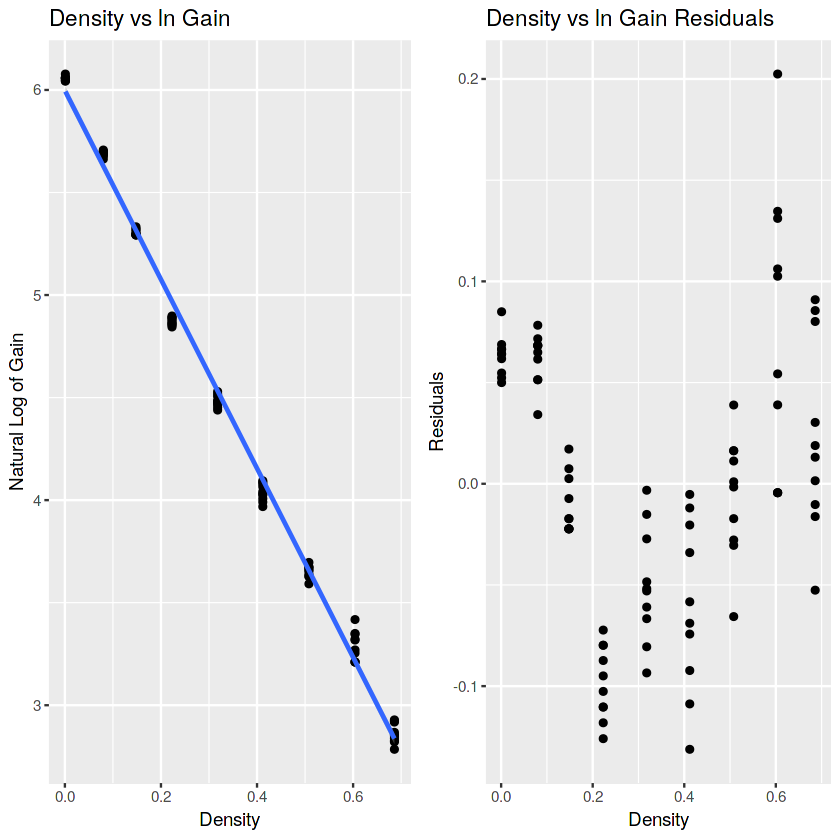

In [9]:
# transform data (take the ln of y axis) and fit to linear regression
gauge$ln_gain = log(gauge$gain)
reg_plot = ggplot(gauge, aes(x=density, y=ln_gain)) +
    geom_point() +
    stat_smooth(method='lm', formula = y~x) +
    labs(title="Density vs ln Gain", x="Density", y="Natural Log of Gain")

# compute the residuals for the linear regression and plot
lin_reg = lm(gauge$ln_gain ~ gauge$density)
residuals = data.frame(x=gauge$density, resid=resid(lin_reg))
resid_plot = ggplot(residuals, aes(x=x, y=resid)) +
    geom_point() +
    labs(title="Density vs ln Gain Residuals", x="Density", y="Residuals")

# put both plots side by side
grid.arrange(reg_plot, resid_plot, ncol=2)

# print out the equation of the line and the sum of squared residuals
summarize_fit(lin_reg)

#### Below is the model we propose

intercept:		 2.465989 
slope:			 -1.105212 
sum squared residuals:	 0.01539044 
r squared:		 0.9972425

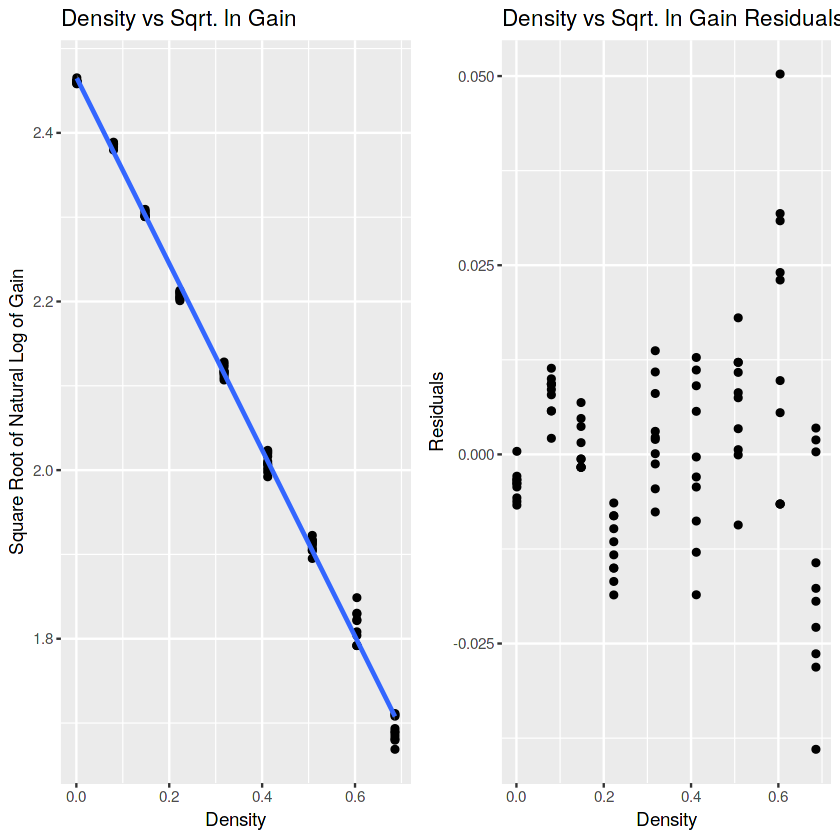

In [10]:
# transform data (take the sqrt of the ln of y axis) and fit to linear regression
gauge$sqrt_ln_gain = sqrt(log(gauge$gain))
reg_plot = ggplot(gauge, aes(x=density, y=sqrt_ln_gain)) +
    geom_point() +
    stat_smooth(method='lm', formula = y~x) +
    labs(title="Density vs Sqrt. ln Gain", x="Density", y="Square Root of Natural Log of Gain")

# compute the residuals for the linear regression and plot
lin_reg = lm(gauge$sqrt_ln_gain ~ gauge$density)
residuals = data.frame(x=gauge$density, resid=resid(lin_reg))
resid_plot = ggplot(residuals, aes(x=x, y=resid)) +
    geom_point() +
    labs(title="Density vs Sqrt. ln Gain Residuals", x="Density", y="Residuals")

# put both plots side by side
grid.arrange(reg_plot, resid_plot, ncol=2)

# print out the equation of the line and the sum of squared residuals
summarize_fit(lin_reg)

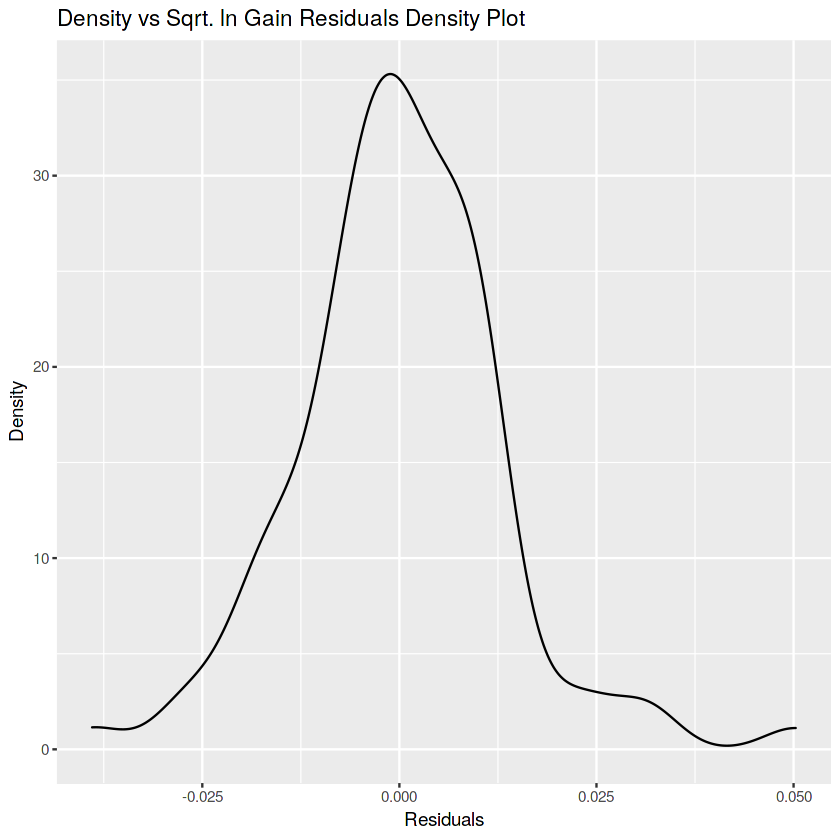

In [11]:
ggplot(residuals, aes(x=resid)) +
    geom_density() +
    labs(title="Density vs Sqrt. ln Gain Residuals Density Plot", x="Residuals", y="Density")

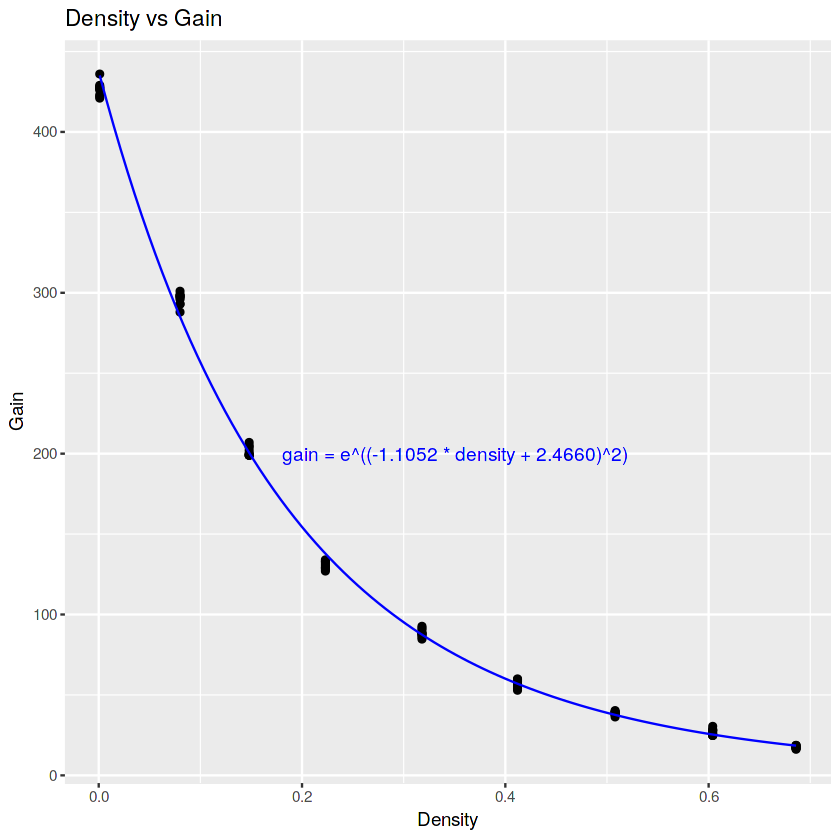

In [12]:
m = -1.105212
b = 2.465989

f = function(x) exp(1)^((m * x + b)^2)

# plot the original data but with our proposed regression line
ggplot(gauge, aes(x=density, y=gain)) +
    geom_point() +
    stat_function(fun=f, color="blue") +
    labs(title="Density vs Gain", x="Density", y="Gain") +
    annotate(geom="text", x=.35, y=200, label="gain = e^((-1.1052 * density + 2.4660)^2)", color="blue")

#### What if data was not reported accurately?

My plan is to simulate a large number of times the following procedure:

1. For each density value, vary the value by +\- 10% (or some other value in the range with a uniform distribution)
2. Fit the best line again and record the coefficients
3. Plot the distributions of the coefficients and analyze
4. ???
5. Profit

In [13]:
# make a copy of the original df to not screw up anything later
# since we will always need to take the log of gain, do so now
original_df = data.frame(select(gauge, sqrt_ln_gain, density))
head(original_df)

,sqrt_ln_gain,density
,<dbl>,<dbl>
1,1.693487,0.686
2,1.688404,0.686
3,1.681462,0.686
4,1.668835,0.686
5,1.684957,0.686
6,1.708148,0.686


In [14]:
# parameters
N = 5000         # how many times to simulate
V = .15          # range of variation for density (from -V to +V)

# create lists to hold the simulated coefficients
slopes = vector("list", length=N)
intercepts = vector("list", length=N)

# create a function to vary the density column by any amount between -V and +V
vary_density = function(x) {
    vary_amount = runif(n=1, min=-V, max=V) + 1
    return(x * vary_amount)
}

# simulate N times
for(i in 1:N) {
    # first create a copy of the original df so our changes don't carry over between iterations
    copied_df = data.frame(original_df)

    # modify the density column with the random variation
    copied_df$density = unlist(lapply(copied_df$density, vary_density), use.names=F)

    # do linear regression as before and record the coefficients
    lin_reg = lm(sqrt_ln_gain ~ density, data=copied_df)
    slopes[i] = lin_reg$coefficients[2]
    intercepts[i] = lin_reg$coefficients[1]
}

In [15]:
# WARNING: DO NOT UNCOMMENT AND RUN THIS CELL UNLESS YOU WANT TO HAVE TO
# REDO THE CUSTOM TEXT ON THE FOLLOWING GRAPHS

# # combine the lists into a single dataframe and save
# to_save = do.call(rbind, Map(data.frame, slope=slopes, intercept=intercepts))
# write.table(to_save, "simulated_density_coefficients.txt", sep=" ", row.names=F)

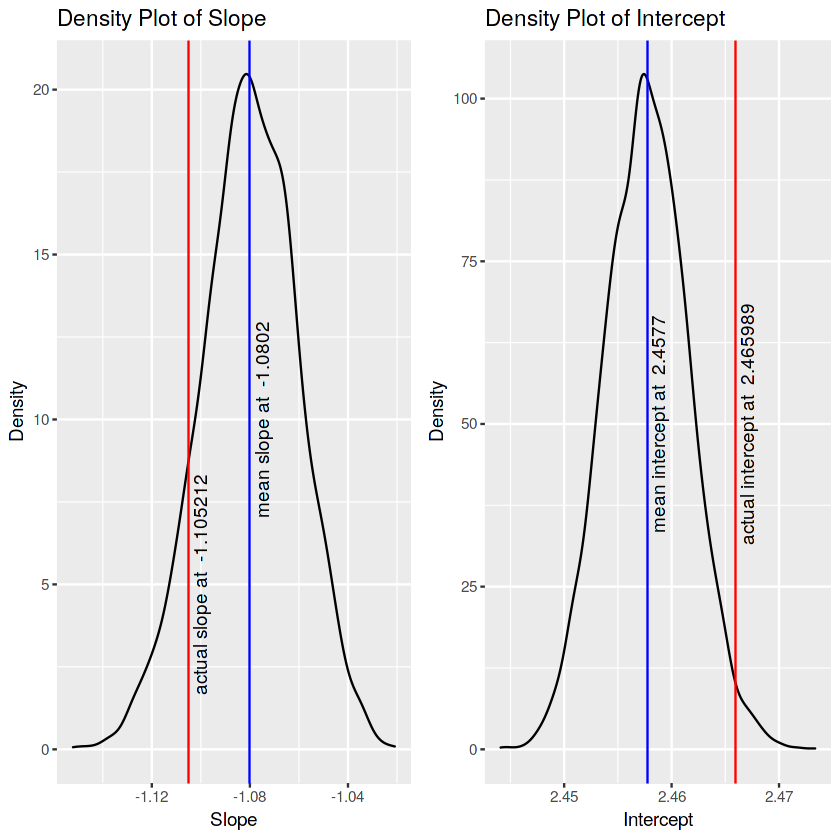

In [16]:
# load the saved data
sdc = read.table("./simulated_density_coefficients.txt", sep="", header=T)

# plot the distribution of slopes and intercepts
slope_plot = ggplot(sdc, aes(x=slope)) +
    geom_density() +
    geom_vline(aes(xintercept=mean(slope)), color="blue") +
    annotate("text", label=paste("mean slope at ", round(mean(sdc$slope), digits=4)), x=mean(sdc$slope)+.005, y=10, angle=90) +
    geom_vline(aes(xintercept=m), color="red") +
    annotate("text", label=paste("actual slope at ", m), x=m+.005, y=5, angle=90) +
    labs(title="Density Plot of Slope", x="Slope", y="Density")
intercept_plot = ggplot(sdc, aes(x=intercept)) +
    geom_density() +
    geom_vline(aes(xintercept=mean(intercept)), color="blue") +
    annotate("text", label=paste("mean intercept at ", round(mean(sdc$intercept), digits=4)), x=mean(sdc$intercept)+.001, y=50, angle=90) +
    geom_vline(aes(xintercept=b), color="red") +
    annotate("text", label=paste("actual intercept at ", b), x=b+.001, y=50, angle=90) +
    labs(title="Density Plot of Intercept", x="Intercept", y="Density")

# put both plots side by side
grid.arrange(slope_plot, intercept_plot, ncol=2)

In [17]:
# constant for percent variation
C = .01

In [18]:
# get the mean and standard deviation of simulated slope
slope_mean = mean(sdc$slope)
slope_std = sd(sdc$slope)

# compute the probability of getting within C of the ovserved value
abs(pnorm(m + (m * C), mean=slope_mean, sd=slope_std, lower.tail=T) - pnorm(m - (m * C), mean=slope_mean, sd=slope_std, lower.tail=T))

[1] 0.2049453

In [19]:
# get the mean and standard deviation of simulated intercept
intercept_mean = mean(sdc$intercept)
intercept_std = sd(sdc$intercept)

# compute the probability of getting within C of the ovserved value
abs(pnorm(b + (b * C), mean=intercept_mean, sd=intercept_std, lower.tail=T) - pnorm(b - (b * C), mean=intercept_mean, sd=intercept_std, lower.tail=T))

[1] 0.9999885

## Predicting

intercept:		 2.225997 
slope:			 -0.9023087 
sum squared residuals:	 0.01256495 
r squared:		 0.9972425

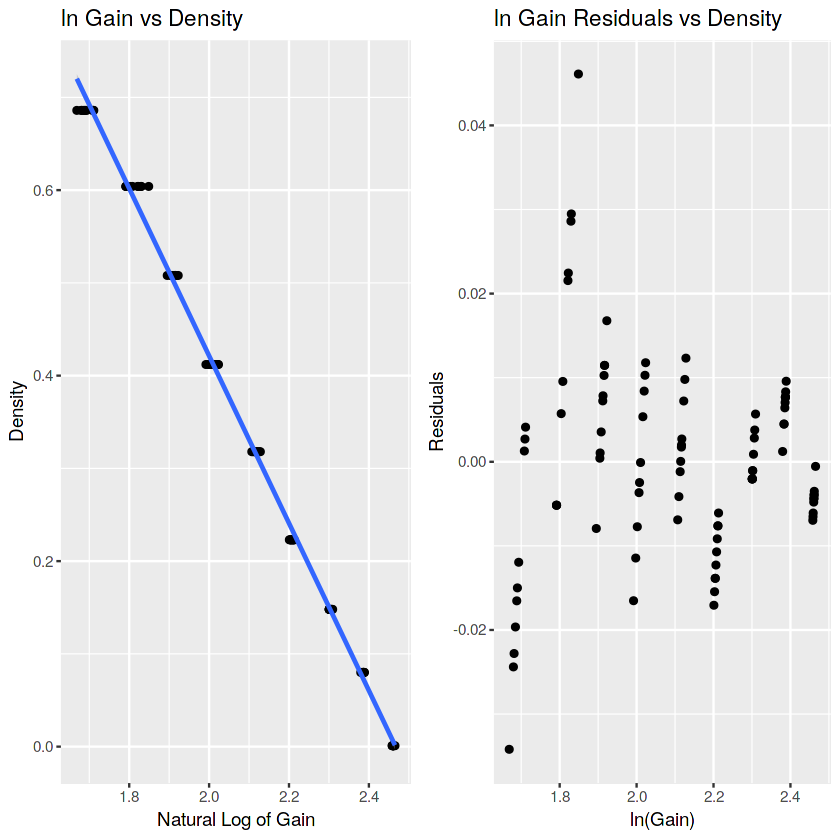

In [20]:
# create inverse plots for the above models (predicting density with gain)

# transform data (take the sqrt(ln(#)) of y axis) and fit to linear regression
gauge$sqrt_ln_gain = sqrt(log(gauge$gain))
inv_reg_plot = ggplot(gauge, aes(x=sqrt_ln_gain, y=density)) +
    geom_point() +
    stat_smooth(method='lm', formula = y~x) +
    labs(title="ln Gain vs Density", y="Density", x="Natural Log of Gain")

# compute the residuals for the linear regression and plot
inv_lin_reg = lm(density ~ sqrt_ln_gain, data = gauge)
inv_residuals = data.frame(x=gauge$sqrt_ln_gain, resid=resid(inv_lin_reg))
inv_resid_plot = ggplot(inv_residuals, aes(x=x, y=resid)) +
    geom_point() +
    labs(title="ln Gain Residuals vs Density", x="ln(Gain)", y="Residuals")

# put both plots side by side
grid.arrange(inv_reg_plot, inv_resid_plot, ncol=2)

# print out the equation of the line and the sum of squared residuals
summarize_fit(inv_lin_reg)

In [21]:
# create a confidence interval for the regression line

# find slope of regression line
slope = inv_lin_reg$coefficients[[2]]

# find standard deviation of slope
mse = sum(inv_lin_reg$residuals^2)/(nrow(gauge)-2)
deviations = var(gauge$sqrt_ln_gain)*(nrow(gauge)-1)
slope_sd = sqrt(mse/deviations)

# create confidence interval for slope
slope_me = qt(.975, nrow(gauge)-2, lower.tail = TRUE) * slope_sd
cat("95% Confidence Interval for slope: (", slope - slope_me, ",", slope + slope_me, ")\n")



# find y-int of regression line
yint = inv_lin_reg$coefficients[[1]]

# find standard deviation of y-int
meanx = mean(gauge$sqrt_ln_gain)
yint_sd = sqrt(mse*(1/nrow(gauge) + meanx))

# create confidence interval for y-intervept
yint_me = qt(.975, nrow(gauge)-2, lower.tail = TRUE) * yint_sd
cat("95% Confidence Interval for y-int: (", yint - yint_me, ",", yint + yint_me, ")")

95% Confidence Interval for slope: ( -0.9123602 , -0.8922572 )


95% Confidence Interval for y-int: ( 2.191493 , 2.2605 )

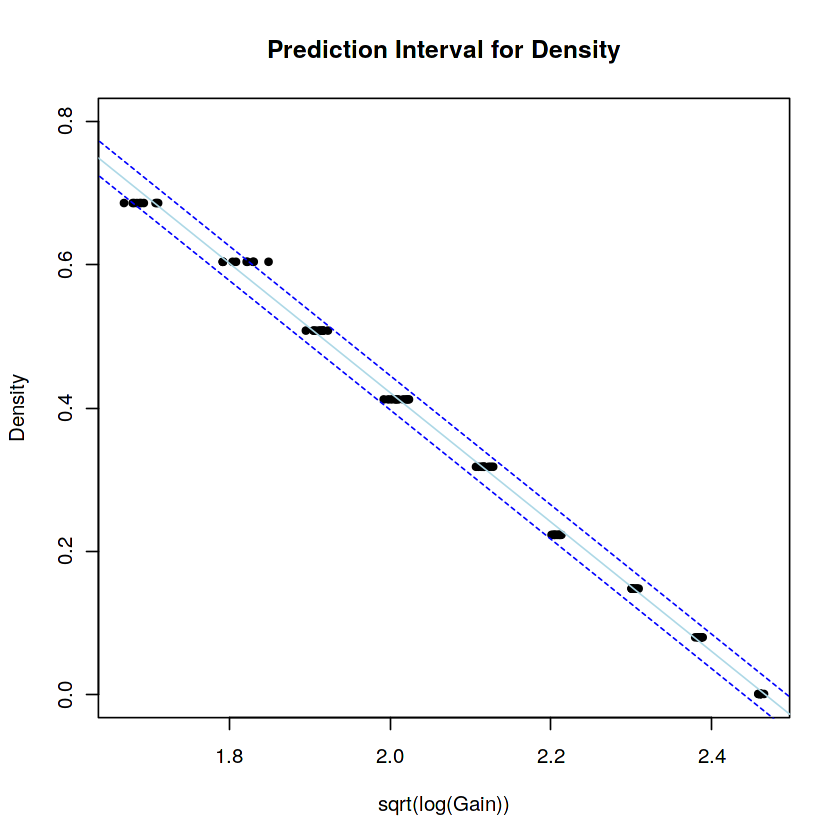

In [22]:
# plot prediction interval with confidence bands

# plot data and regression line
newx <- seq(1.6, 2.5, .9/89)
plot(gauge$sqrt_ln_gain, gauge$density, ylim=c(0, .8), xlab="sqrt(log(Gain))", ylab="Density", main="Prediction Interval for Density", pch = 20)
abline(inv_lin_reg, col="lightblue")

# get upper and lower bounds for prediction interval of 90 points
conf_interval <- predict(inv_lin_reg, newdata=data.frame(sqrt_ln_gain = newx), interval="prediction",
                         level = 0.95)
# plot points around regression line
lines(newx, conf_interval[,2], col="blue", lty=2)
lines(newx, conf_interval[,3], col="blue", lty=2)

In [23]:
# create a function that produces a prediction interval for density, given a measured gain
pred_interval = function(input){
    transformed = sqrt(log(input))
    output = predict(lm(density ~ sqrt_ln_gain, data = gauge), newdata=data.frame(sqrt_ln_gain = transformed), interval="prediction")
    return (c(output[2], output[3]))
}

In [24]:
pred_interval(426.7)

[1] -0.01865639  0.02964767

In [25]:
pred_interval(38.6)

[1] 0.4774172 0.5253238